1. Setup


In [8]:
from pymongo import MongoClient

In [9]:
connection_string = "mongodb://localhost:27017/"
client = MongoClient(connection_string)

In [10]:
print(client.server_info()) 

{'version': '7.0.2', 'gitVersion': '02b3c655e1302209ef046da6ba3ef6749dd0b62a', 'modules': [], 'allocator': 'system', 'javascriptEngine': 'mozjs', 'sysInfo': 'deprecated', 'versionArray': [7, 0, 2, 0], 'openssl': {'running': 'Apple Secure Transport'}, 'buildEnvironment': {'distmod': '', 'distarch': 'aarch64', 'cc': '/Applications/Xcode13.2.1.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/clang: Apple clang version 13.0.0 (clang-1300.0.29.30)', 'ccflags': '-Wno-error=unknown-warning-option -isysroot /Applications/Xcode13.2.1.app/Contents/Developer/Platforms/MacOSX.platform/Developer/SDKs/MacOSX12.1.sdk -mmacosx-version-min=11.0 --target=darwin20.0.0 -arch arm64 -Werror -include mongo/platform/basic.h -ffp-contract=off -fasynchronous-unwind-tables -g2 -Wall -Wsign-compare -Wno-unknown-pragmas -Winvalid-pch -fno-omit-frame-pointer -fno-strict-aliasing -O2 -Wno-unused-local-typedefs -Wno-unused-function -Wno-unused-private-field -Wno-deprecated-declarations -Wno-tautolog

Ein ODM (Object-Document Mapping) verbindet Objekte der Anwendungslogik mit Dokumenten in dokumentenorientierten Datenbanken. Es erleichtert die Speicherung, den Abruf und die Verarbeitung von Daten, indem Objekte in Dokumente umgewandelt werden und umgekehrt. Diese Verknüpfung ermöglicht es Entwicklern, objektorientierte Programmierparadigmen zu verwenden und gleichzeitig die Vorteile dokumentenorientierter Datenbanken wie Flexibilität und Skalierbarkeit zu nutzen.

2.DB, Collection, Document

In [11]:
def list_all_databases():
    print('Databases')
    dbs = client.list_database_names()
    for db in dbs:
        print('- ' + db)
    print()
    print('Select Database: ')
    return dbs

In [12]:
def select_database(dbs):
    db = input()
    if db not in dbs:
        print("No Database")
        return None
    try:
        db = client[db]
    except Exception as e:
        print("Fehler beim Abrufen der Datenbank:", e)
        return  None
    
    
    print('Collections')
    for collection in db.list_collection_names():
        print('- ' + collection)
        print()
    print('Select Collections: ')
    return db

In [13]:
def select_collection(db):
    col = input()
    if col not in db.list_collection_names():
        print(col, db.list_collection_names())
        print("No Collection")
        return None
    
    try:
        col = db.get_collection(col)
    except Exception as e:
        print("Fehler beim Abrufen der Collection:", e)
        return  None
    
    if col.name not in db.list_collection_names():
        return None
    
    print('Documents')
    document_ids = [str(doc['_id']) for doc in col.find({}, {'_id': 1})]
    for doc_id in document_ids:
        print("- " + doc_id)
    print()
    print('Select Documents: ')
    return col


In [14]:
from bson import ObjectId
def select_document(collection):
    try:
        _id = input()
        print(_id)
        doc = collection.find_one({'_id': ObjectId(_id)})
        print(f"{collection.database.name}.{collection.name}.{doc['_id']}")
        print()
        for key, value in doc.items():
            print(f"{key}: {value}")
        return doc
    except:
        print('no Document')
        return None

        

In [15]:
import time

def press_button():
    print("Press any button to return")
    time.sleep(2)
    input()

In [16]:

while True:
    dbs = list_all_databases()
    time.sleep(1)
    db = select_database(dbs)
    if db is None:
        press_button() 
        continue 
    
    time.sleep(1)
    collection = select_collection(db)
    if collection is None:
        press_button()
        continue 
        
    time.sleep(1)
    doc = select_document(collection)
    press_button()


Databases
- admin
- cloud
- config
- formum
- hallo
- local
- media
- power
- restaurant
- shop
- space
- stundenplan
- test
- traffic

Select Database: 
No Database
Press any button to return


KeyboardInterrupt: 

3.Crud

In [17]:
db = client['restaurant']
db.list_collection_names()

['restaurants', 'neighborhoods']

In [18]:
collection = db.get_collection('restaurants')


In [19]:
boroughs = collection.distinct('borough')
for borough in boroughs:
    print(borough)

Bronx
Brooklyn
Manhattan
Missing
Queens
Staten Island


In [20]:
from bson import SON

pipeline = [
    {
        "$unwind": "$grades"
    },
    {
        "$group": {
            "_id": "$restaurant_id",
            "restaurant": { "$first": "$$ROOT" },
            "avg_rating": {"$avg": "$grades.score"}
        }
    },
    {
        "$sort": SON([("avg_rating", -1)])
    },
    {
        "$limit": 3
    },
    {
        "$replaceRoot": { "newRoot": "$restaurant" }
    },
    {
        "$project": { "averageRating": 0 }
    }
]
for doc in collection.aggregate(pipeline):
    print(doc)

{'_id': ObjectId('5eb3d669b31de5d588f48751'), 'address': {'building': '1068', 'coord': [-73.958167, 40.681357], 'street': 'Fulton Street', 'zipcode': '11238'}, 'borough': 'Brooklyn', 'cuisine': 'Juice, Smoothies, Fruit Salads', 'grades': {'date': datetime.datetime(2015, 1, 20, 0, 0), 'grade': 'Not Yet Graded', 'score': 75}, 'name': 'Juice It Health Bar', 'restaurant_id': '50015959', 'countrycode': 'US'}
{'_id': ObjectId('5eb3d669b31de5d588f4897e'), 'address': {'building': '2166', 'coord': [-73.852077, 40.8339379], 'street': 'Westchester Avenue', 'zipcode': '10462'}, 'borough': 'Bronx', 'cuisine': 'Chinese', 'grades': {'date': datetime.datetime(2015, 1, 20, 0, 0), 'grade': 'Not Yet Graded', 'score': 73}, 'name': 'Golden Dragon Cuisine', 'restaurant_id': '50017374', 'countrycode': 'US'}
{'_id': ObjectId('5eb3d669b31de5d588f4866b'), 'address': {'building': '2400', 'coord': [-73.887492, 40.8556246], 'street': 'Arthur Avenue', 'zipcode': '10458'}, 'borough': 'Bronx', 'cuisine': 'Bakery', 'g

In [21]:
le_perigord_coords = [45.185454, -0.725086]  # corrected the coordinates
collection.create_index([("address.coord", "2dsphere")])
pipeline = [
    {
        "$geoNear": {
            "near": {"type": "Point", "coordinates": le_perigord_coords},
            "distanceField": "distance",
            "spherical": True,
            "key": "address.coord"  # removed the dollar sign ('$') from the field name
        }
    },
    {
        "$sort": {"distance": 1}  # Sort by distance
    },
    {
        "$limit": 1
    },
    {
      "$project": { "distance": 0 }
    }
]
for doc in collection.aggregate(pipeline):
    print(doc)


{'_id': ObjectId('5eb3d669b31de5d588f471a2'), 'address': {'building': '4953', 'coord': [28.1530999, -25.8109474], 'street': "B'Way", 'zipcode': '10034'}, 'borough': 'Manhattan', 'cuisine': 'Spanish', 'grades': [{'date': datetime.datetime(2014, 7, 14, 0, 0), 'grade': 'A', 'score': 12}, {'date': datetime.datetime(2013, 7, 29, 0, 0), 'grade': 'A', 'score': 7}], 'name': 'Dichter Pharmacy', 'restaurant_id': '41721961', 'countrycode': 'US'}


In [22]:
from datetime import datetime
import time
from bson import ObjectId


def get_pipline_with_filter(name='', cuisine=''):
    pipeline = []
    if  cuisine != '':
        pipeline.append({"$match": {"cuisine": cuisine}})
    if name != '' :   
        pipeline.append({"$match": {"name": name}})
    return pipeline

def get_grade( grade, score):
    return {
        "date": datetime.now(),
        "score": score, 
        "grade": grade
        }

documents = list(collection.aggregate(get_pipline_with_filter(input('name'), input('cuisine'))))

print(documents[:100])
id = None
if len(documents) == 0:
    print("No Documents")
elif len(documents) == 1:
    document = documents[0]
    id = document['_id']
elif len(documents) > 1:
    print("es gibt mehrere einträge")
    print('welcher möchten sie?')
    time.sleep(2)
    user_input = input('id')
    id = user_input if user_input else None
    
if id is not None:
    doc = collection.update_one({"_id": ObjectId(id)}, {"$push": {"grades": get_grade(input('grade'), input("score"))}})
    print('erfolgreich updated', doc)
    print(collection.find_one({"_id": ObjectId(id)}))
    

[{'_id': ObjectId('5eb3d668b31de5d588f4292a'), 'address': {'building': '2780', 'coord': [-73.98241999999999, 40.579505], 'street': 'Stillwell Avenue', 'zipcode': '11224'}, 'borough': 'Brooklyn', 'cuisine': 'American', 'grades': [{'date': datetime.datetime(2014, 6, 10, 0, 0), 'grade': 'A', 'score': 5}, {'date': datetime.datetime(2013, 6, 5, 0, 0), 'grade': 'A', 'score': 7}, {'date': datetime.datetime(2012, 4, 13, 0, 0), 'grade': 'A', 'score': 12}, {'date': datetime.datetime(2011, 10, 12, 0, 0), 'grade': 'A', 'score': 12}], 'name': 'Riviera Caterer', 'restaurant_id': '40356018', 'countrycode': 'US'}, {'_id': ObjectId('5eb3d668b31de5d588f4292b'), 'address': {'building': '7114', 'coord': [-73.9068506, 40.6199034], 'street': 'Avenue U', 'zipcode': '11234'}, 'borough': 'Brooklyn', 'cuisine': 'Delicatessen', 'grades': [{'date': datetime.datetime(2014, 5, 29, 0, 0), 'grade': 'A', 'score': 10}, {'date': datetime.datetime(2014, 1, 14, 0, 0), 'grade': 'A', 'score': 10}, {'date': datetime.datetime

KeyboardInterrupt: 

4. Connection-String

Umgebungsvariabel Setzen
export MONGO_CONNECTION_STRING="mongodb://localhost:27017/"
ins bashprofile schreiben

In [23]:
import os
from pymongo import MongoClient

def connect_to_database():
    connection_string = os.getenv('MONGO_CONNECTION_STRING')
    print(connection_string)
    if connection_string is None:
        print("Die Umgebungsvariable 'MONGO_CONNECTION_STRING' ist nicht gesetzt.")
        return

    try:
     return MongoClient(connection_string)
    
        
    except Exception as e:
        print("Fehler bei der Verbindung zur Datenbank:", e)

connect_to_database().list_database_names()


mongodb://localhost:27017/


['admin',
 'cloud',
 'config',
 'formum',
 'hallo',
 'local',
 'media',
 'power',
 'restaurant',
 'shop',
 'space',
 'stundenplan',
 'test',
 'traffic']

5. Power Statistic

In [35]:
from datetime import datetime
import psutil

class Power:
    def __init__(self, cpu_percent=None, ram_total=None, ram_used=None, timestamp=None, _id=None):
        if cpu_percent is None:
            self.cpu_percent = psutil.cpu_percent(interval=1)
        else:
            self.cpu_percent = cpu_percent
            
        ram = psutil.virtual_memory()
        if ram_total is None:
            self.ram_total =  ram.total / (1024 ** 2)
        else:
            self.ram_total = ram_total
            
        if ram_used is None:
            self.ram_used = ram.used / (1024 ** 2)
        else:
            self.ram_used = ram_used
            
        self.timestamp = timestamp if timestamp else datetime.now()
        if _id is not None:
            self._id = _id

In [36]:
import psutil
import time
collection = connect_to_database().get_database('power').get_collection('power')
while True:
        
        power = Power()
        print(power.__dict__)
        collection.insert_one(power.__dict__)
        if collection.count_documents({}) > 10000:
            oldest_log = collection.find_one(sort=[("timestamp", 1)])
            collection.delete_one({"_id": oldest_log["_id"]})
        
        time.sleep(1)

mongodb://localhost:27017/
{'cpu_percent': 27.1, 'ram_total': 16384.0, 'ram_used': 5924.125, 'timestamp': datetime.datetime(2024, 5, 24, 13, 29, 52, 414721)}
{'cpu_percent': 10.6, 'ram_total': 16384.0, 'ram_used': 5868.453125, 'timestamp': datetime.datetime(2024, 5, 24, 13, 29, 54, 472230)}
{'cpu_percent': 11.7, 'ram_total': 16384.0, 'ram_used': 5865.296875, 'timestamp': datetime.datetime(2024, 5, 24, 13, 29, 56, 483491)}
{'cpu_percent': 12.0, 'ram_total': 16384.0, 'ram_used': 5872.75, 'timestamp': datetime.datetime(2024, 5, 24, 13, 29, 58, 498323)}
{'cpu_percent': 11.5, 'ram_total': 16384.0, 'ram_used': 5854.59375, 'timestamp': datetime.datetime(2024, 5, 24, 13, 30, 0, 509536)}
{'cpu_percent': 16.9, 'ram_total': 16384.0, 'ram_used': 5991.15625, 'timestamp': datetime.datetime(2024, 5, 24, 13, 30, 2, 518535)}
{'cpu_percent': 19.0, 'ram_total': 16384.0, 'ram_used': 6042.234375, 'timestamp': datetime.datetime(2024, 5, 24, 13, 30, 4, 528548)}
{'cpu_percent': 13.4, 'ram_total': 16384.0, 'ra

KeyboardInterrupt: 

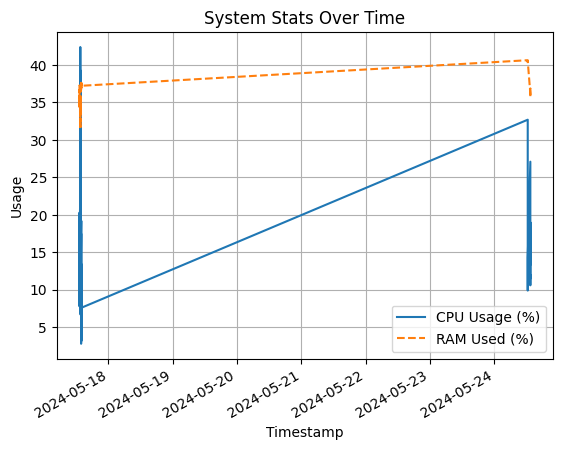

In [37]:
import matplotlib.pyplot as plt

powerlist = []
for power in list(collection.find()):
    powerlist.append(Power(**power))

timestamps = [stats.timestamp for stats in powerlist]
cpu_percents = [stats.cpu_percent for stats in powerlist]
ram_used = [stats.ram_used for stats in powerlist]
ram_total = [stats.ram_total for stats in powerlist]
ram_precents = [100/stats.ram_total*stats.ram_used for stats in powerlist]

plt.plot(timestamps, cpu_percents, label='CPU Usage (%)')
plt.plot(timestamps, ram_precents, label='RAM Used (%)', linestyle='--')

plt.xlabel('Timestamp')
plt.ylabel('Usage')
plt.title('System Stats Over Time')
plt.legend()
plt.grid(True)

plt.gcf().autofmt_xdate()
plt.show()

6. DAO

In [27]:
class Room():
    def __init__(self, name, seats, is_reservable, _id = None):
        if(_id is not None):
            self._id = _id
        self.name = name
        self.seats = seats
        self.is_reservable = is_reservable

In [28]:
from pymongo import MongoClient

class Dao_room():
    def __init__(self, connection_string):
        self.connection_string = connection_string
        self.col = MongoClient(connection_string)["buildings"]["rooms"]

    def create(self, room):
        self.col.insert_one(room.__dict__)

    def read(self):
        room = Room(**self.col.find_one())
        return room
    
    def update(self, room):
        self.col.update_one({"_id": room._id}, {"$set": room.__dict__})
    
    def delete(self, room):
        return self.col.delete_one({"_id": room._id})

In [29]:
db = connect_to_database()['jokes']

mongodb://localhost:27017/


In [30]:
class Joke():
    def __init__(self, text, category, author, _id = None):
        if _id is not None:
            self._id = _id
        self.text = text
        self.category = category
        self.author = author

In [31]:
from pymongo import MongoClient

class Dao_joke():
    def __init__(self, connection_string):
        self.connection_string = connection_string
        self.col = MongoClient(connection_string)["jokes"]["jokes"]

    def insert(self, joke):
        self.col.insert_one(joke.__dict__)

    def get_category(self, category):
        joke = Joke(**self.col.find_one({"category": category}))
        return joke
    
    def delete(self, _id):
        return self.col.delete_one({"_id": _id})

7. Files

In [44]:
from pymongo import MongoClient
import gridfs
import os

client = MongoClient('mongodb://localhost:27017/')
db = client['files']
fs = gridfs.GridFS(db)

path = input("File: ")

# Save
with open(path, 'rb') as file:
    file_id = fs.put(file, filename=os.path.basename(path))
print("File saved")


# Read
file = fs.get(file_id)
restore_path = os.path.join(".", file.filename)

data = fs.get(file_id).read()
with open("Hallo.md", 'wb') as file:
    file.write(data)
print("File restored")


File saved
File restored


Ich habe den Namen geändert damit ich direckt sehe das ein neues File gemacht wurde.

In [77]:
from pymongo import MongoClient
import gridfs
import os

# Verbindung zur MongoDB herstellen
client = MongoClient('mongodb://localhost:27017/')
db = client['photo_album']  # Neue Datenbank für das Fotoalbum erstellen
fs = gridfs.GridFS(db)  # GridFS-Objekt erstellen
for collection_name in db.list_collection_names():
    db.drop_collection(collection_name)
def add_photo_to_album(photo_path, album_name):
    # Foto zum Fotoalbum hinzufügen
    with open(photo_path, 'rb') as file:
        photo_id = fs.put(file, filename=os.path.basename(photo_path), metadata={'album': album_name}, collection_name=album_name)
        print(photo_id)
    print("Foto zum Album {} hinzugefügt".format(album_name))

def get_photos_from_album(album_name, path):
    # Fotos aus dem Fotoalbum abrufen
    photos = fs.find({'metadata.album': album_name})
    album_dir = os.path.join(path, album_name)
    os.makedirs(album_dir, exist_ok=True)
    for photo in photos:
        data = photo.read()
        with open(os.path.join(album_dir, photo.filename), 'wb') as file:
            file.write(data)
        print("Foto {} aus Album {} heruntergeladen".format(photo.filename, album_name))

# Beispielverwendung
add_photo_to_album("foto-album/ai-generated-8700383_1280.jpg", "Urlaub")
add_photo_to_album("foto-album/brown-bear-7597616_1280.jpg", "Urlaub")
add_photo_to_album("foto-album/cigarette-8771248_1280.png", "Urlaub")
add_photo_to_album("foto-album/gorilla-8760357_1280.jpg", "Schule")
add_photo_to_album("foto-album/one-person-8742116_1280.jpg", "Schule")
add_photo_to_album("foto-album/penguin-8751952_1280.jpg", "Schule")
add_photo_to_album("foto-album/sky-8763986_1280.jpg", "Urlaub")
get_photos_from_album("Schule", 'herunterladen')

665087807e91617616cd32eb
Foto zum Album Urlaub hinzugefügt
665087807e91617616cd32ed
Foto zum Album Urlaub hinzugefügt
665087807e91617616cd32f0
Foto zum Album Urlaub hinzugefügt
665087807e91617616cd32f3
Foto zum Album Schule hinzugefügt
665087807e91617616cd32f5
Foto zum Album Schule hinzugefügt
665087807e91617616cd32f7
Foto zum Album Schule hinzugefügt
665087807e91617616cd32f9
Foto zum Album Urlaub hinzugefügt
Foto gorilla-8760357_1280.jpg aus Album Schule heruntergeladen
Foto one-person-8742116_1280.jpg aus Album Schule heruntergeladen
Foto penguin-8751952_1280.jpg aus Album Schule heruntergeladen


['fs.chunks', 'fs.files']

8. Listen interpretieren

In [104]:
from PIL import Image, ImageDraw

im = Image.new(mode="RGB", size=(200,200))

draw = ImageDraw.Draw(im)
draw.line([100,200, 150, 180], fill=0x00ffff, width=3)

im.show()


In [120]:
client = MongoClient('mongodb://localhost:27017/')
db = client[('restaurant')] 
col = db['neighborhoods']
im = Image.new(mode="RGB", size=(200,-200,200, -200))

for neighborhood in col.find():
    draw = ImageDraw.Draw(im)
    coordinates = neighborhood['geometry']['coordinates'][0]
    one_dimensional_list = [item for sublist in coordinates for item in sublist]
    print(one_dimensional_list)
    draw.line((one_dimensional_list), fill=0x00ffff, width=3)
    im.show()

[-73.94193078816193, 40.70072523469547, -73.9443878859649, 40.70042452378256, -73.94424286147482, 40.69969927964773, -73.94409591260093, 40.69897295461309, -73.94394947271304, 40.69822127983908, -73.94391750192877, 40.69805620211356, -73.94380383211836, 40.697469265449826, -73.94378455587042, 40.6973697290538, -73.94374306706803, 40.69715549995503, -73.9437245356891, 40.697059812179496, -73.94368427322361, 40.696851909818065, -73.9436842703752, 40.69685189440415, -73.94363806934868, 40.69661331854307, -73.94362121369004, 40.696526279661654, -73.9435563415296, 40.69619128295102, -73.94354024149403, 40.6961081421151, -73.94352527471477, 40.69603085523812, -73.94338802084431, 40.69528899051899, -73.943242490861, 40.694557485733355, -73.94312826743185, 40.693967038330925, -73.94311427813774, 40.693894720557466, -73.94310040895432, 40.69382302905847, -73.94295136131598, 40.69309078423585, -73.94280765181726, 40.692357794128945, -73.94266181801652, 40.69162434435983, -73.94251587928605, 40.6

ValueError: incorrect coordinate type